In [252]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citiesData = pd.read_csv(city_data_to_load)
ridesData = pd.read_csv(ride_data_to_load)
print(citiesData.size)

# Combine the data into a single dataset
data = pd.merge(ridesData, citiesData, on="city", how="outer" )
data1 = pd.merge(ridesData.drop_duplicates('city'), citiesData, on="city", how="outer" )


# Display the data table for preview

data1.head(5)

360


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

,cityType,cityName,count,faresList,sum,mean
0,Rural,Bradshawfurt,7,[19.74],19.74,19.74
1,Rural,Garzaport,7,[36.16],36.16,36.16
2,Rural,Harringtonfort,4,[47.33],47.33,47.33
3,Rural,Jessicaport,1,[43.69],43.69,43.69
4,Rural,Lake Jamie,4,[26.09],26.09,26.09
5,Rural,Lake Latoyabury,2,[47.9],47.90,47.90
6,Rural,Michaelberg,6,[54.85],54.85,54.85
7,Rural,New Ryantown,2,[42.68],42.68,42.68
8,Rural,Newtonview,1,[19.39],19.39,19.39
9,Rural,North Holly,8,[12.42],12.42,12.42


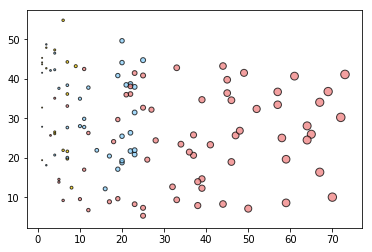

In [254]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

info = data1.groupby(['type', 'city'])
colors = ["gold", "lightskyblue", "lightcoral"]

price = {'driver_count':'sum', 'fare':['unique', 'sum','mean']}
info = pd.DataFrame(info.agg(price))
info = info.reset_index()
#df.columns = df.columns.get_level_values(0)
info.columns = ['cityType', 'cityName', 'count', 'faresList', 'sum', 'mean']


#graph = {info['cityType'].unique():colors}

#graphData = info.loc[info['cityType']=='Rural', ['count', 'mean']]
for eachType, color in zip((info['cityType'].unique()), colors):
    graphData = info.loc[info['cityType']==eachType, ['count', 'mean']]
    x_axis, dataY = graphData['count'], graphData['mean']
    #print(data)
    plt.scatter(x_axis, dataY,  marker="o", facecolors=color, edgecolors="black",
            s=x_axis, alpha=0.75)
    
    

import random 
# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(0, 100, 1)

# Create a random array of data that we will use for our y values
#data = [random.random() for value in x_axis]
    
# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
info

In [250]:
# Show plot
plt.show()

## Total Fares by City Type

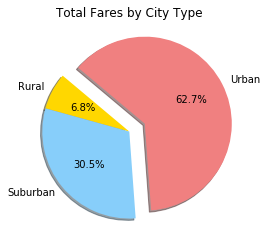

In [116]:
# Calculate Type Percents

Fares = data.groupby('type')['fare'].sum()
Percentage = Fares/sum(Fares)
TotalFaresByCityType = pd.DataFrame({"TotalFares":Fares, "Percentage":Percentage})

# Build Pie Chart
# Labels for the sections of our pie chart
labels = list(TotalFaresByCityType.index)

# The values of each section of the pie chart
sizes = TotalFaresByCityType['Percentage'] * 100

# The colors of each section of the pie chart
#Gold, Light Sky Blue, and Light Coral
colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0, 0, 0.2)
# Tells matplotlib to seperate the "Python" section from the others
plt.title("Total Fares by City Type")
chart1 = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)


In [81]:
# Show Figure
plt.show()

## Total Rides by City Type

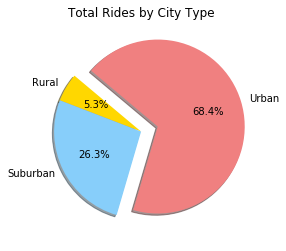

In [111]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure

Fares = data.groupby('type')['ride_id'].count()
Percentage = Fares/sum(Fares)
TotalFaresByCityType = pd.DataFrame({"TotalNumOfRides":Fares, "Percentage":Percentage})

# Build Pie Chart
# Labels for the sections of our pie chart
labels = list(TotalFaresByCityType.index)

# The values of each section of the pie chart
sizes = TotalFaresByCityType['Percentage'] * 100

# The colors of each section of the pie chart
#Gold, Light Sky Blue, and Light Coral
colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0, 0, 0.2)
# Tells matplotlib to seperate the "Python" section from the others
plt.title("Total Rides by City Type")
chart1 = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)



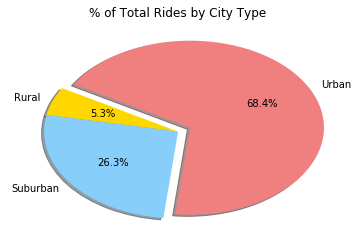

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

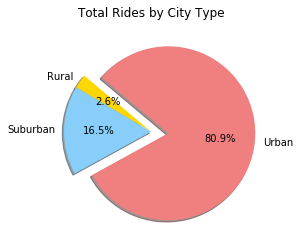

In [120]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure

Fares = data1.groupby('type')['driver_count'].sum()
Percentage = Fares/sum(Fares)
TotalFaresByCityType = pd.DataFrame({"TotalNumOfRides":Fares, "Percentage":Percentage})

# Build Pie Chart
# Labels for the sections of our pie chart
labels = list(TotalFaresByCityType.index)

# The values of each section of the pie chart
sizes = TotalFaresByCityType['Percentage'] * 100

# The colors of each section of the pie chart
#Gold, Light Sky Blue, and Light Coral
colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0, 0, 0.2)
# Tells matplotlib to seperate the "Python" section from the others
plt.title("Total Rides by City Type")
chart1 = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

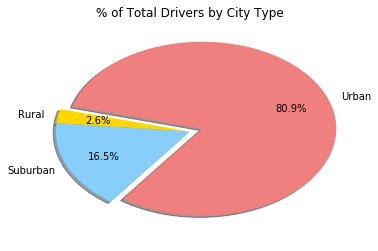

In [6]:
# Show Figure
plt.show()